<a href="https://colab.research.google.com/github/Eyu-148/CS254ML-HW/blob/main/Eyu_Chen_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

In [ ]:
import os
import numpy as np
import pandas as pd
from past.builtins import xrange
from scipy.special import expit
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Assignment 3 - Part 1(Logistic regression without regularization)

In this exercise, you will implement logistic regression and apply it to the dataset Iris.csv

In this dataset there are two continuous variables named "PetalLengthCm" and "PetalWidthCm". Yhe type of flower associated with these features is assigned in the "species" column. Setosa is labeled as 0 and Versicolor is labeled as 1. Your task will be to classify between these two types of flowers.  


### Part 1, Q1 -  [20 pts]

1. [10 points] Load the data and split it into X(feature vectors) and Y(target/output vectors).

In [ ]:
# Load iris dataset
# Note: This dataset must be contained in a "data" folder
path = 'https://raw.githubusercontent.com/Eyu-148/CS254ML-HW/main/Iris.csv'
data = pd.read_csv(path)
data.head()
print(data)

data['ones'] = np.ones(data.shape[0])

# Split data into X and Y
x = data[["PetalLengthCm", "PetalWidthCm", "ones"]].values
y = data["Species"].values.reshape(len(data),1)
print(np.shape(x), np.shape(y), np.shape(x.T))

     Id  PetalLengthCm  PetalWidthCm  Species
0     1            1.4           0.2        0
1     2            1.4           0.2        0
2     3            1.3           0.2        0
3     4            1.5           0.2        0
4     5            1.4           0.2        0
..  ...            ...           ...      ...
95   96            4.2           1.2        1
96   97            4.2           1.3        1
97   98            4.3           1.3        1
98   99            3.0           1.1        1
99  100            4.1           1.3        1

[100 rows x 4 columns]
(100, 3) (100, 1) (3, 100)


2. [10 points] Visualize the data. 
For visualizing,PetalLengthCm will be in the X-axis and PetalWidthCm will be on the Y-axis. Additionally, assign '+' for Setosa points and 'o' for versicolor points.for Setosa, and circle for versicolor.

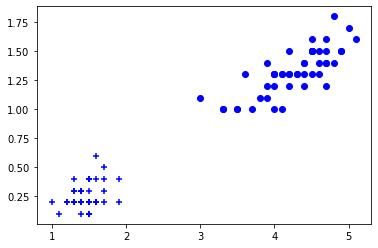

In [ ]:
# Write your code here
# Reading through by Id, which should be i
# for id in data.values[:, 0]:
for (a, b, s) in zip(data.values[:,1], data.values[:,2], data.values[:,3]):
    if s == 0:
        plt.scatter(a, b, color='b', marker="+")
    if s == 1:
        plt.scatter(a, b, color='b', marker="o")

### Part 1, Q2 -  [10 pts]

Before you start with the implementation of the cost function and gradient descent algorithm for logistic Regression, at first implement the function "sigmoid"  that can be called by the rest of your program. Test it when you are finished. Try testing a few values by calling sigmoid(x). For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5.
The equation for sigma is 
![](https://github.com/Eyu-148/CS254ML-HW/blob/main/images/H1.png?raw=1)
Here 

![](https://github.com/Eyu-148/CS254ML-HW/blob/main/images/H2.png?raw=1)

The dimension of Z should be (100,1)

In [ ]:
def sigmoid(Z):
    return 1 / (1+np.exp(-Z))

In [ ]:
# The following lines are for few test case check. You sigmoid should be fine if you are passing this test cases.
assert sigmoid(0) == 0.5, "The sigmoid function is wrong."
assert 1.1 > sigmoid(100)  > 0.9999, "The sigmoid function is wrong."
assert -0.1 < sigmoid(-100) < 0.0001, "The sigmoid function is wrong."

# visual inspection
# This below line will help you to test your sigmoid function for diiferrent values between -1 and 1. 
list("x: %6.3f sigx: %6.3f"% (x, sigx) for (sigx, x) in  zip(sigmoid(np.linspace(-1,1,11)), np.linspace(-1,1,11)))
# plt.plot(np.linspace(-6, 6, 101), sigmoid(np.linspace(-6, 6, 101)))

['x: -1.000 sigx:  0.269',
 'x: -0.800 sigx:  0.310',
 'x: -0.600 sigx:  0.354',
 'x: -0.400 sigx:  0.401',
 'x: -0.200 sigx:  0.450',
 'x:  0.000 sigx:  0.500',
 'x:  0.200 sigx:  0.550',
 'x:  0.400 sigx:  0.599',
 'x:  0.600 sigx:  0.646',
 'x:  0.800 sigx:  0.690',
 'x:  1.000 sigx:  0.731']

### Part 1, Q3 -  [20 pts]



1.  [20 points] Implement cost function (calcLogRegressionCost) as detailed in the cell below.

The vectorized equation for the cost function is given below for your convenient.  

![](https://github.com/Eyu-148/CS254ML-HW/blob/main/images/J1.png?raw=1)



Hint: Once you are done,  call your "calcLogRegressionCost" using the initial parameters of θ. You should see that the cost is about 0.693.

Note: no need to add the regularization term. 

In [ ]:
# You may change the number of parameters according to your wish for
# all the funtions depending on your implementation.

def calcLogRegressionCost(x, y, theta):
    # x : the feature vector
    # y : target vector / output vector
    # theta : weight vector 
    
    m = x.shape[0]
    error = y.T.dot(np.log(sigmoid(x.dot(theta)))) + (1-y).T.dot(np.log(1-sigmoid(x.dot(theta))))
    #cost = (np.dot(y.T, np.log(sigmoid(np.dot(x, theta)))) +  np.dot((1-y).T, np.log(1-sigmoid(np.dot(x, theta)))))/ -m
    cost = error / -m
    return cost

def logRegressionGradientDescent(x, y, thetaInit, eta, epochs):
    # x : feature vector
    # Y : target vector/ output vector
    # theta : weight vector 
    # eta : learning rate
    # epochs : gradient descent steps taken
    
    m, d = x.shape
    theta = thetaInit.copy()

    losses = [calcLogRegressionCost(x, y, theta)]
    for i in range(epochs):
        gradient = 2 * (x.T.dot(sigmoid(x.dot(theta)) - y)) / m
        theta -= eta * gradient
        losses.append(calcLogRegressionCost(x, y, theta))

    return theta, losses

In [ ]:
# This part is for testing your algorithms
theta = np.zeros((x.shape[1], 1))
print(calcLogRegressionCost(x, y, theta))
# Desired output: 0.693...

[[0.69314718]]


### Part 1, Q4 -  [20 pts]

As you have the gradient decent algorithm implemented

1. [10 Points] Run the gradient descent algorithm to fit your parameters theta to the training set.

In [ ]:
eta = 0.1 
epochs = 5000
thetaInit = np.zeros((x.shape[1], 1))
theta, cost = logRegressionGradientDescent(x, y, thetaInit, eta, epochs)
print(calcLogRegressionCost(x, y, thetaInit))

[[0.69314718]]


2. [4 Points] Report optimal final θ.

In [ ]:
# Write your code here
print("Optimal theta:\n", theta)

Optimal theta:
 [[  2.80475893]
 [  4.23880022]
 [-10.18403071]]



3. [6 Points] Plot the cost vs the number of epochs. what is the best learning rate you chose and why ?

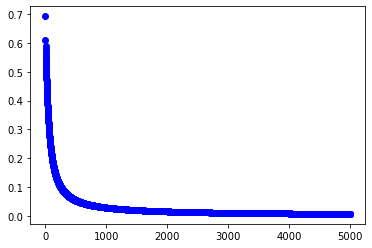

In [ ]:
# Write your code here
for (e, c) in zip(range(epochs), cost):
    plt.scatter(e,c, color='b')
    plt.plot(e, c, "r")

### Part 1, Q5 -  [30 pts]
At this point, you have the optimal theta.

1. [8 Points] Implement the predict_proba function.

In [ ]:
def predict_proba(x, theta):
    # you need to know the probability of a certain test sample falling in a certain class.
    # For this you need a function which will give you the probability.
    # This function should return a probability
    
    # Start your code from here
    prob = sigmoid(x.dot(theta))
    return prob[0]

2. [6 Points] Suppose that the petal length is 2.0 and petal width is 0.3. Using the predict_proba function, find the probability of this sample being a Setosa.

In [ ]:
# Write your code here
dataInit = np.array([2.0, 0.3, 1.0])
prob = predict_proba(dataInit, theta)

print("Probability to be a setosa:", 1-prob)

Probability to be a setosa: 0.9645272328756719


3. [16 Points] Plot the decision boundary with respect to the data. The plot should include PetalLengthCm in the X-axis and PetalWidthCm in the Y-axis. Additionally, assign '+' for Setosa points and 'o' for versicolor points. The decision boundary should separate the classes using the optimal theta found in Part 1 Q3.

In [ ]:
# write you plotting code here ...
# Note: this function may need parameters
def plotData():
    for (a, b, s) in zip(data.values[:,1], data.values[:,2], data.values[:,3]):
        if s == 0:
            plt.scatter(a, b, color='b', marker="+")
        if s == 1:
            plt.scatter(a, b, color='b', marker="o")

In [ ]:
def plotDecisionBoundary(x, theta):
    # x : the feature vector
    # theta : weight vector 
    
    # find min,max x values and solve for y = 0 at those positions
    boundary_xs = np.array([np.min(x[:,1]), np.max(x[:,1])])
    boundary_ys = -1 * (-.5 + theta[0] + theta[1]*boundary_xs) / theta[2]
    
    # plot points
    plt.plot(boundary_xs, boundary_ys, 'b-', label='Decision Boundary')

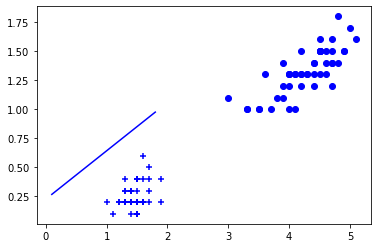

In [ ]:
plotData() # Note: this function may need parameters
#print(x)
plotDecisionBoundary(x, theta)

# Assignment 3 - Part 2 (Enhanced Logistic regression)
# Required for Graduate Students, extra credit for Undergraduates

Import and examine the dataset ex2data2.txt. There are two continuous independent variables in the data - “Test 1” and “Test 2”. Our target variable is binary and labeled 0(did not passed the test) or 1(passed the test).

In this part of the Assignment, you will build a logistic regression model to predict whether a sample passed the test or not (a model that estimates the probability of being passed or not based on test 1 and test 2).

### Part 2, Q1 -  [15 pts]

1. [5 Points]  Load the data and visualize it. (You can follow the steps from part1, Q1)

For visualizing, test 1 will be in the X-axis, test 2 will be on the Y-axis. Assign '+' for Setosa points and 'o' for versicolor points.for Setosa, and circle for versicolor.

In [ ]:
path = os.getcwd() + '/data/ex2data2.txt'

In [ ]:
# write you plotting code here ...
# Note: this function may need parameters
def plotData():

plotData()


Before going further, you will be implementing Ridge regularized gradient descent with its corresponding regularized cost function, which will be needed at the end of the assignment.
    

2. [5 Points] Implement Ridge Regularized Logistic Regression cost function named calcLogRegressionCostR following the given equation.
The equation is ![](https://github.com/Eyu-148/CS254ML-HW/blob/main/images/G2.png?raw=1)

In [ ]:
def calcLogRegressionCostR(x, y, theta, alpha=0):
    # x : feature vector
    # y : target vector/ output vector
    # theta : weight vector
    # alpha : regularization parameter

    # add code here


3. [5 Points] Implement logRegressionGradientDescentR . This should be ridge regularized. The equation is 
![](https://github.com/Eyu-148/CS254ML-HW/blob/main/images/G3.png?raw=1)

In [ ]:
def logRegressionGradientDescentR(x, y, thetaInit, eta, alpha, epochs):
    # X : feature vector
    # Y : target vector/ output vector
    # theta : weight vector 
    # eta : learning rate
    # alpha : regulirzation rate
    # epochs : steps you want to take.
    
    m, d = x.shape
    theta = thetaInit.copy()
    
    losses = [calcLogRegressionCostR(x, y, theta)]
    for i in range(epochs):
        
        # Add code here (Gradient descent with regularization)
        
        theta -= eta * gradient
        losses.append(calcLogRegressionCostR(x, y, theta))

    return theta, losses   

In [ ]:
# This part is given for the testing purpose    
    
initial_theta = np.zeros((x.shape[1], 1))
eta = 
alpha = 
epochs =

theta, cost = logRegressionGradientDescentR(x, y, initial_theta, eta, alpha, epochs)
print(calcLogRegressionCostR(x, y, initial_theta, 0.1))
print(theta)

### Part 2, Q2 -  [20 pts]
As you may have noticed in Part 2, Q1 plotting, the data are not linearly separable. When data are not linearly separable, one way to fit the data better is to create more features from each data point.Mapping data to polynomial terms is one of the simplest way.  

1. [5 Points] Map the features into all polynomial terms of x1 and x2 up to the six power. Use PolynomialFeatures from scikit learn.

![polyn6.png](attachment:polyn6.png)


In [ ]:
# Write your code here


2. [2 Points] Report optimal final θ on the polynominal features using logRegressionGradientDescent.

Note: There should be 28 features as your are taking power of 6.

In [ ]:
theta_scale = np.zeros((x_scale.shape[1],1))
thetaOpt, cost = logRegressionGradientDescentR(x_scale, y, theta_scale, 0.01, 0, 250)
print(thetaOpt)

3. [3 Points] Plot the cost with the number of epochs.

In [ ]:
# Write your code here


4. [5 Points] Now, try to plot the decision boundary of the polynominal features.Use  logRegressionGradientDescentR for plotting the decision boundary.

In [ ]:
def plotBoundary(theta, x, y, poly, alpha=0):

    # find optimal thetas
    theta, cost = logRegressionGradientDescentR(x, y, theta, 0.2, alpha, 10_000)
    
    # create search space and placeholder
    xvals = np.linspace(-1, 1.5, 50)
    yvals = np.linspace(-1, 1.5, 50)
    zvals = np.zeros((len(xvals), len(yvals)))
    
    # compute zval for all combinations of xvals/yvals
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            featuresij = poly.fit_transform(np.array([[xvals[i], yvals[j]]]))
            zvals[j][i] = np.dot(theta.T, featuresij.T)
    
    
    contour = plt.contour(xvals, yvals, zvals, [0])
    plt.title("Decision Boundary with Alpha = " + str(alpha))

In [ ]:
plt.figure(figsize=(6,6))
plotData()
plotBoundary(theta_scale, x_scale, y, poly)

  5. [5 Points] What can you comment about the decision boundary from the previous question? Is the decision boundary behaving as expected?

In [ ]:
# Write your answer here


### Part 2, Q3 -  [15 pts]

Regularization is an important part of fitting data more accurately. In the next part try four different regularization values and plot the decision boundary for each. The values might be a mixture of small, medium, and large values.

Comment on the decision boundary for different regularization values? How is regularization effecting our model? Does this reduce overfitting?

Note: Use regularized version of logRegressionGradientDescentR and calcLogRegressionCostR for decision boundary plotting.

In [ ]:
reg_vals = [ # add reg values ]
plt.figure(figsize=(22,15))

for i in range(len(reg_vals)):
    plt.subplot(221 + i)
    plotData()
    plotBoundary(theta_scale, x_scale, y, poly, alpha=reg_vals[i])
